In [1]:
parsed_input = {}

# j30
with open("data/rcpsp/j30.sm/j3043_5.sm") as file:
    # ******
    print(file.readline())
    # File with base data
    print(file.readline())
    # initial value random generator
    print(file.readline())
    # ******
    print(file.readline())

    # projects : x
    no_projects = int(file.readline().split(":")[1].strip())
    parsed_input["no_projects"] = no_projects
    # jobs incl. supersource/sunk: y
    no_jobs = int(file.readline().split(":")[1].strip())
    parsed_input["no_jobs (incl. supersource/sink)"] = no_jobs
    # horizon
    horizon = int(file.readline().split(":")[1].strip())
    parsed_input["horizon"] = horizon
    # Resources
    print(file.readline())
    parsed_input["resources"] = {}
    # renewable
    no_renewable = int(file.readline().split(":")[1].split()[0].strip())
    parsed_input["resources"]["no_renewable"] = no_renewable
    # non-renewable
    no_non_renewable = int(file.readline().split(":")[1].split()[0].strip())
    parsed_input["resources"]["no_non_renewable"] = no_non_renewable
    # doubly constrained
    no_doubly = int(file.readline().split(":")[1].split()[0].strip())
    parsed_input["resources"]["no_doubly_constrained"] = no_doubly

    # ******
    file.readline()
    # Project INFORMATION   
    parsed_input["project_information"] = {}
    file.readline()
    # pronr. #jobs rno_el. date, duedate, tardcost, MPM-Time   
    file.readline()
    project_info_line = file.readline()
    print("Project Information")
    print(project_info_line)
    pronr, no_jobs, rel_date, duedate, tardcost, mpm_time = [int(number.strip()) for number in project_info_line.split(" ") if len(number) > 0]
    parsed_input["project_information"]["pronr"] = pronr
    parsed_input["project_information"]["no_jobs"] = no_jobs
    parsed_input["project_information"]["rel_date"] = rel_date
    parsed_input["project_information"]["duedate"] = duedate
    parsed_input["project_information"]["tardcost"] = tardcost
    parsed_input["project_information"]["mpm_time"] = mpm_time
    # ******
    file.readline()

    # Precedence relation
    file.readline()
    parsed_input["job_specifications"] = []

    # parsed_input["precedence_relations"] = []
    # jobnr. # modes #successorcs successors
    file.readline()
    line = file.readline()
    while not line.startswith("*"):
        line = [char.strip() for char in line.split(" ") if len(char) > 0]
        print(line)
        job_specification = {}

        job_nr = int(line[0].strip())
        job_specification["job_nr"] = job_nr
        no_modes = int(line[1].strip())
        job_specification["no_modes"] = no_modes
        no_successors = int(line[2].strip())
        job_specification["no_successors"] = no_successors
        successors = [node_no.strip() for node_no in line[3:3+no_successors]]
        job_specification["successors"] = successors

        parsed_input["job_specifications"].append(job_specification)

        line = file.readline()

    # ******
    # file.readline()
    # requests / durations
    file.readline()
    # parsed_input["requests_durations"] = []
    # jobnr. mode duration R1 R2 R3 R4
    file.readline()
    # ---------
    file.readline()
    line = file.readline()
    job_no = 0
    while not line.startswith("*"):
        line = [char.strip() for char in line.split(" ") if len(char) > 0]
        print(line)
        # request_duration = {}
        project_specification = parsed_input["job_specifications"][job_no]

        job_nr = int(line[0].strip())
        print(job_nr, project_specification["job_nr"])
        assert job_nr == project_specification["job_nr"]
        # request_duration["job_nr"] = job_nr
        mode = int(line[1].strip())
        assert mode == project_specification["no_modes"]
        # request_duration["mode"] = mode
        duration = int(line[2].strip())
        # request_duration["duration"] = duration
        job_specification["duration"] = duration
        resource_req = [int(req.strip()) for req in line[3:7]]
        job_specification["request_duration"] = {}
        job_specification["request_duration"]["R1"] = resource_req[0]
        job_specification["request_duration"]["R2"] = resource_req[1]
        job_specification["request_duration"]["R3"] = resource_req[2]
        job_specification["request_duration"]["R4"] = resource_req[3]

        # parsed_input["requests_durations"].append(request_duration)

        line = file.readline()
        job_no += 1
    
    
    # ******
    # file.readline()
    # resource availabilities
    file.readline()
    parsed_input["resource_availabilities"] = {}
    #  R1 R2 R3 R4
    file.readline()
    line = [int(number.strip()) for number in file.readline().split(" ") if len(number) > 0]
    print(line)
    parsed_input["resource_availabilities"]["R1"] = line[0]
    parsed_input["resource_availabilities"]["R2"] = line[1]
    parsed_input["resource_availabilities"]["R3"] = line[2]
    parsed_input["resource_availabilities"]["R4"] = line[3]

parsed_input





************************************************************************

file with basedata            : j30_59.bas

initial value random generator: 2137992213

************************************************************************

RESOURCES

Project Information
    1     30      0       62       28       62

['1', '1', '3', '2', '3', '4']
['2', '1', '3', '7', '8', '17']
['3', '1', '3', '5', '11', '12']
['4', '1', '3', '6', '10', '13']
['5', '1', '3', '6', '8', '15']
['6', '1', '3', '9', '16', '22']
['7', '1', '2', '18', '21']
['8', '1', '3', '9', '14', '26']
['9', '1', '3', '20', '25', '29']
['10', '1', '3', '14', '21', '24']
['11', '1', '3', '13', '14', '15']
['12', '1', '3', '13', '16', '21']
['13', '1', '2', '17', '22']
['14', '1', '3', '23', '29', '31']
['15', '1', '3', '19', '23', '28']
['16', '1', '3', '17', '18', '25']
['17', '1', '2', '19', '28']
['18', '1', '2', '20', '24']
['19', '1', '2', '20', '26']
['20', '1', '1', '30']
['21', '1', '2', '27', '28']
['22', '1', '2', '

{'no_projects': 1,
 'no_jobs (incl. supersource/sink)': 32,
 'horizon': 180,
 'resources': {'no_renewable': 4,
  'no_non_renewable': 0,
  'no_doubly_constrained': 0},
 'project_information': {'pronr': 1,
  'no_jobs': 30,
  'rel_date': 0,
  'duedate': 62,
  'tardcost': 28,
  'mpm_time': 62},
 'job_specifications': [{'job_nr': 1,
   'no_modes': 1,
   'no_successors': 3,
   'successors': ['2', '3', '4']},
  {'job_nr': 2,
   'no_modes': 1,
   'no_successors': 3,
   'successors': ['7', '8', '17']},
  {'job_nr': 3,
   'no_modes': 1,
   'no_successors': 3,
   'successors': ['5', '11', '12']},
  {'job_nr': 4,
   'no_modes': 1,
   'no_successors': 3,
   'successors': ['6', '10', '13']},
  {'job_nr': 5,
   'no_modes': 1,
   'no_successors': 3,
   'successors': ['6', '8', '15']},
  {'job_nr': 6,
   'no_modes': 1,
   'no_successors': 3,
   'successors': ['9', '16', '22']},
  {'job_nr': 7, 'no_modes': 1, 'no_successors': 2, 'successors': ['18', '21']},
  {'job_nr': 8,
   'no_modes': 1,
   'no_succe

In [2]:
# the patterson format
parsed_input = {}

with open("data/rcpsp/RG30_Set 1/Pat479.rcp") as file:
    # 1. line: blank line
    file.readline()
    # 2. line: Number of activities (starting with node 1 and two dummy nodes inclusive), Number of renewable resource
    number_of_jobs, number_of_renewable_resources = [int(number.strip()) for number in file.readline().split(" ") if len(number.strip()) > 0]
    parsed_input["number_of_jobs"] = number_of_jobs
    parsed_input["resources"] = {}
    # parsed_input["number_of_renewable_resources"] = number_of_renewable_resources
    # parsed_input["resources"]["no_non_renewable"] = 0
    # parsed_input["resources"]["no_doubly_constrained"] = 0

    # 3. line: Availability for each renewable resource
    resource_availabilities = [int(number.strip()) for number in file.readline().split(" ") if len(number.strip()) > 0]
    
    parsed_input["resources"]["renewable_resources"] = {}
    parsed_input["resources"]["renewable_resources"]["number_of_resources"] = number_of_renewable_resources
    parsed_input["resources"]["renewable_resources"]["renewable_availabilities"] = resource_availabilities
    
    # 4. line: blank line
    file.readline()

    parsed_input["job_specifications"] = []
    # following lines
    # duration, renewable resource consumption, number of successors, successors
    job_no = 0
    line = [int(number.strip()) for number in file.readline().split(" ") if len(number.strip()) > 0]
    while line != [0, 0, 0, 0, 0, 0]:
        print(line)
        job_specification = {}

        job_specification["job_nr"] = job_no

        duration = line[0]
        renewable_resource_consumption = line[1:1+int(number_of_renewable_resources)]
        job_specification["duration"] = duration
        job_specification["request_duration"] = {}
        job_specification["request_duration"]["R1"] = renewable_resource_consumption[0]
        job_specification["request_duration"]["R2"] = renewable_resource_consumption[1]
        job_specification["request_duration"]["R3"] = renewable_resource_consumption[2]
        job_specification["request_duration"]["R4"] = renewable_resource_consumption[3]
        
        number_of_successors = line[1+int(number_of_renewable_resources)]
        job_specification["number_of_successors"] = number_of_successors

        successors = line[2+int(number_of_renewable_resources):2+int(number_of_renewable_resources)+int(number_of_successors)]
        job_specification["successors"] = successors
        
        line = [int(number.strip()) for number in file.readline().split(" ") if len(number.strip()) > 0]

        parsed_input["job_specifications"].append(job_specification)

job_specification = {"job_nr": number_of_jobs, "duration": 0, "request_duration": {"R1": 0, "R2": 0, "R3": 0, "R4": 0}, "number_of_successors": 0, "successors": []}
parsed_input["job_specifications"].append(job_specification)
parsed_input


[0, 0, 0, 0, 0, 4, 2, 4, 15, 31]
[8, 1, 0, 1, 1, 3, 30, 20, 3]
[10, 0, 1, 2, 4, 4, 29, 12, 11, 5]
[2, 1, 1, 4, 0, 2, 29, 6]
[7, 3, 0, 3, 4, 1, 6]
[10, 7, 0, 8, 2, 2, 28, 7]
[10, 0, 3, 5, 9, 2, 27, 8]
[1, 2, 0, 3, 8, 3, 26, 19, 9]
[3, 0, 2, 3, 4, 1, 10]
[5, 0, 2, 6, 2, 2, 25, 13]
[2, 5, 4, 0, 3, 3, 25, 19, 14]
[6, 0, 5, 5, 4, 1, 13]
[8, 5, 0, 2, 7, 2, 24, 14]
[6, 5, 0, 6, 2, 2, 22, 16]
[6, 0, 7, 5, 4, 2, 26, 16]
[4, 3, 3, 0, 7, 1, 17]
[4, 6, 0, 5, 3, 1, 18]
[7, 4, 0, 7, 2, 1, 21]
[2, 5, 8, 2, 0, 1, 21]
[1, 3, 2, 0, 3, 1, 21]
[8, 4, 3, 3, 0, 1, 23]
[2, 5, 1, 0, 4, 1, 23]
[9, 6, 0, 6, 3, 1, 32]
[2, 6, 0, 1, 4, 1, 32]
[8, 5, 0, 3, 4, 1, 32]
[1, 3, 6, 0, 2, 1, 32]
[1, 4, 0, 3, 6, 1, 32]
[6, 0, 4, 3, 4, 1, 32]
[1, 1, 5, 0, 3, 1, 32]
[6, 0, 9, 5, 4, 1, 32]
[8, 0, 6, 5, 5, 1, 32]


{'number_of_jobs': 32,
 'resources': {'renewable_resources': {'number_of_resources': 4,
   'renewable_availabilities': [10, 10, 10, 10]}},
 'job_specifications': [{'job_nr': 0,
   'duration': 0,
   'request_duration': {'R1': 0, 'R2': 0, 'R3': 0, 'R4': 0},
   'number_of_successors': 4,
   'successors': [2, 4, 15, 31]},
  {'job_nr': 0,
   'duration': 8,
   'request_duration': {'R1': 1, 'R2': 0, 'R3': 1, 'R4': 1},
   'number_of_successors': 3,
   'successors': [30, 20, 3]},
  {'job_nr': 0,
   'duration': 10,
   'request_duration': {'R1': 0, 'R2': 1, 'R3': 2, 'R4': 4},
   'number_of_successors': 4,
   'successors': [29, 12, 11, 5]},
  {'job_nr': 0,
   'duration': 2,
   'request_duration': {'R1': 1, 'R2': 1, 'R3': 4, 'R4': 0},
   'number_of_successors': 2,
   'successors': [29, 6]},
  {'job_nr': 0,
   'duration': 7,
   'request_duration': {'R1': 3, 'R2': 0, 'R3': 3, 'R4': 4},
   'number_of_successors': 1,
   'successors': [6]},
  {'job_nr': 0,
   'duration': 10,
   'request_duration': {'R1'

In [3]:
from docplex.cp.model import CpoModel

In [4]:
parsed_input

{'number_of_jobs': 32,
 'resources': {'renewable_resources': {'number_of_resources': 4,
   'renewable_availabilities': [10, 10, 10, 10]}},
 'job_specifications': [{'job_nr': 0,
   'duration': 0,
   'request_duration': {'R1': 0, 'R2': 0, 'R3': 0, 'R4': 0},
   'number_of_successors': 4,
   'successors': [2, 4, 15, 31]},
  {'job_nr': 0,
   'duration': 8,
   'request_duration': {'R1': 1, 'R2': 0, 'R3': 1, 'R4': 1},
   'number_of_successors': 3,
   'successors': [30, 20, 3]},
  {'job_nr': 0,
   'duration': 10,
   'request_duration': {'R1': 0, 'R2': 1, 'R3': 2, 'R4': 4},
   'number_of_successors': 4,
   'successors': [29, 12, 11, 5]},
  {'job_nr': 0,
   'duration': 2,
   'request_duration': {'R1': 1, 'R2': 1, 'R3': 4, 'R4': 0},
   'number_of_successors': 2,
   'successors': [29, 6]},
  {'job_nr': 0,
   'duration': 7,
   'request_duration': {'R1': 3, 'R2': 0, 'R3': 3, 'R4': 4},
   'number_of_successors': 1,
   'successors': [6]},
  {'job_nr': 0,
   'duration': 10,
   'request_duration': {'R1'

In [ ]:


# Define the problem data
no_jobs = parsed_input["no_jobs (incl. supersource/sink)"]  # number of activities
durations = [job["duration"] for job in parsed_input["job_specifications"]]  # duration of each activity
successors = [[], [0], [0], [1, 2], [3], [4], [3], [5], [6, 7], [8]]  # precedence constraints
capacity = 10  # available resource capacity

# Instantiate the model
model = CpoModel()

# Define the problem variables
start = [model.interval_var(size=duration[i], name=f"act{i}") for i in range(n)]
end = [model.end_of(interval) for interval in start]

# Define the objective function
objective = model.max(end)

# Add the constraints
for i in range(n):
    for j in successors[i]:
        model.add(end[j] <= start[i])
    model.add(model.sum([model.pulse(start[i], duration[i], 1)]) <= capacity)

# Add the variables, objective function, and constraints to the model
model.add(objective)

# Solve the model
solution = model.solve()

# Print the solution
if solution:
    print("Project completion time:", solution.get_objective_value())
    for i in range(n):
        print(f"Activity {i}: start={solution[start[i]].get_start()}, end={solution[end[i]]}")
else:
    print("No solution found.")

In [ ]:
# Import the required modules
from docplex.cp.model import CpoModel
from docplex.cp.solution import CpoSolverSolution

# Define the problem data
n = 10  # number of activities
duration = [5, 3, 7, 2, 6, 4, 3, 2, 5, 3]  # duration of each activity
successors = [[1, 2], [3], [3, 4], [5], [6], [7], [8], [6, 9], [8, 9], []]  # successor list for each activity


requests = 

# Create a CP model
mdl = CpoModel()

# Define the decision variables
s = [mdl.integer_var(name='s[%d]' % i, min=0) for i in range(n)]  # start time of each activity

# Define the objective function
mdl.add(mdl.minimize(mdl.max([s[i] + duration[i] for i in range(n)])))

# Define the constraints
for i in range(n):
    for j in successors[i]:
        mdl.add(s[i] + duration[i] <= s[j])

# Define the initial conditions
mdl.add(s[0] == 0)

# Solve the problem
sol = mdl.solve(TimeLimit=10)

# Print the solution
if sol:
    print("Solution:")
    print("Objective value: ", sol.get_objective_values()[0])
    for i in range(n):
        print("Activity %d starts at %d" % (i, sol.get_value(s[i])))
else:
    print("No solution found.")


In [5]:
parsed_input

{'number_of_jobs': 32,
 'resources': {'renewable_resources': {'number_of_resources': 4,
   'renewable_availabilities': [10, 10, 10, 10]}},
 'job_specifications': [{'job_nr': 0,
   'duration': 0,
   'request_duration': {'R1': 0, 'R2': 0, 'R3': 0, 'R4': 0},
   'number_of_successors': 4,
   'successors': [2, 4, 15, 31]},
  {'job_nr': 0,
   'duration': 8,
   'request_duration': {'R1': 1, 'R2': 0, 'R3': 1, 'R4': 1},
   'number_of_successors': 3,
   'successors': [30, 20, 3]},
  {'job_nr': 0,
   'duration': 10,
   'request_duration': {'R1': 0, 'R2': 1, 'R3': 2, 'R4': 4},
   'number_of_successors': 4,
   'successors': [29, 12, 11, 5]},
  {'job_nr': 0,
   'duration': 2,
   'request_duration': {'R1': 1, 'R2': 1, 'R3': 4, 'R4': 0},
   'number_of_successors': 2,
   'successors': [29, 6]},
  {'job_nr': 0,
   'duration': 7,
   'request_duration': {'R1': 3, 'R2': 0, 'R3': 3, 'R4': 4},
   'number_of_successors': 1,
   'successors': [6]},
  {'job_nr': 0,
   'duration': 10,
   'request_duration': {'R1'

In [8]:
no_jobs = parsed_input["number_of_jobs"]  # number of activities
no_resources = parsed_input["resources"]["renewable_resources"]["number_of_resources"]
durations = [job["duration"] for job in parsed_input["job_specifications"]]  # duration of each activity
successors = [[], [0], [0], [1, 2], [3], [4], [3], [5], [6, 7], [8]]  # precedence constraints
capacities = parsed_input["resources"]["renewable_resources"]["renewable_availabilities"]  # available resource capacity
requests = [[parsed_input["job_specifications"][i]["request_duration"][f"R{k+1}"] for i in range(no_jobs)] for k in range(no_resources) ]

In [6]:

from docplex.cp.model import CpoModel
mdl = CpoModel()

x = [ mdl.interval_var(size = duration, name=f"{i}") for i, duration in enumerate(durations) ] # (4)

mdl.add( [ mdl.minimize ( mdl.max( [mdl.end_of(x[i]) for i in range(no_jobs)] ) ) ] )# (1)

# mdl.add( [ mdl.sum( mdl.pulse(x[i],parsed_input["job_specifications"][i]["request_duration"][f"R{k+1}"]) for i in range(no_jobs)) <= parsed_input["resources"]["renewable_resources"]["renewable_availabilities"][k] for k in range(parsed_input["resources"]["renewable_resources"]["number_of_resources"]) ] )# (2)
mdl.add( [ mdl.sum( mdl.pulse(x[i], requests[k][i]) for i in range(no_jobs)) <= capacities[k] for k in range(no_resources) ] )# (2)

mdl.add( [mdl.end_before_start( x[successor - 1], x[i] ) for (i, job_successors) in enumerate(successors) for successor in job_successors] ) # (3)

sol = mdl.solve(LogVerbosity='Terse')

C:/Users/tomom/AppData/Local/Temp/ipykernel_5636/3975427402.py:9(stream:47:6): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                          VarCumulAtom_67 = pulse(_ITV_1, 0)
C:/Users/tomom/AppData/Local/Temp/ipykernel_5636/3975427402.py:9(stream:47:42): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                           VarCumulAtom_69 = pulse(_ITV_3, 0)
C:/Users/tomom/AppData/Local/Temp/ipykernel_5636/3975427402.py:9(stream:47:114): Warning: Cumulative expression 'pulse': height is zero, expression is zero everywhere.
                                                                                            VarCumulAtom_73 = pulse(_ITV_7, 0)
C:/Users/tomom/AppData/Local/Temp/ipykernel_5636/3975427402.py:9(stream:47:150): Warning: Cumulative expression 'pulse': 

In [7]:
sol.print_solution()

-------------------------------------------------------------------------------
Model constraints: 15, variables: integer: 0, interval: 32, sequence: 0
Solve status: Optimal
Search status: SearchCompleted, stop cause: SearchHasNotBeenStopped
Solve time: 367.96 sec
-------------------------------------------------------------------------------
Objective values: (73,), bounds: (73,), gaps: (0,)
Variables:
   + 32 anonymous variables


In [15]:
import docplex.cp.utils_visu as visu
from pylab import rcParams
rcParams['figure.figsize'] = 25, 5# Draw solution
if sol and visu.is_visu_enabled():
    visu.timeline('Solution SchedOptional', 0, 100)
    for m, machine in df_machines.iterrows():
        visu.sequence(name=m)
        for t in machine_operations[m]:
            wt = sol.get_var_solution(t)
            visu.interval(wt, "salmon", t.get_name())
    visu.show()

NameError: name 'df_machines' is not defined

In [23]:
wt = sol.get_var_solution(x[0])
wt.get_end()


0

In [32]:

if sol and visu.is_visu_enabled():
    visu.timeline('Solution SchedOptional', 0, 1000)
    for job_number in range(no_jobs):
        visu.sequence(name=job_number)
        wt = sol.get_var_solution(x[job_number])
        if wt.is_present():
            if wt.get_start() != wt.get_end():
                print(wt.get_start(), wt.get_end())
                print()
                visu.interval(wt, "salmon", x[job_number].get_name())
visu.show()

0 8

0 10

10 12

12 19

23 33

33 43

43 44

44 47

50 55

44 46

17 23

47 55

55 61

67 73

23 27

19 23

43 50

50 52

19 20

33 41

55 57

0 9

10 12

61 69

0 1

69 70

55 61

8 9

61 67

9 17



IndexError: index out of range

IntervalVarValue(start=0, end=0, size=0)


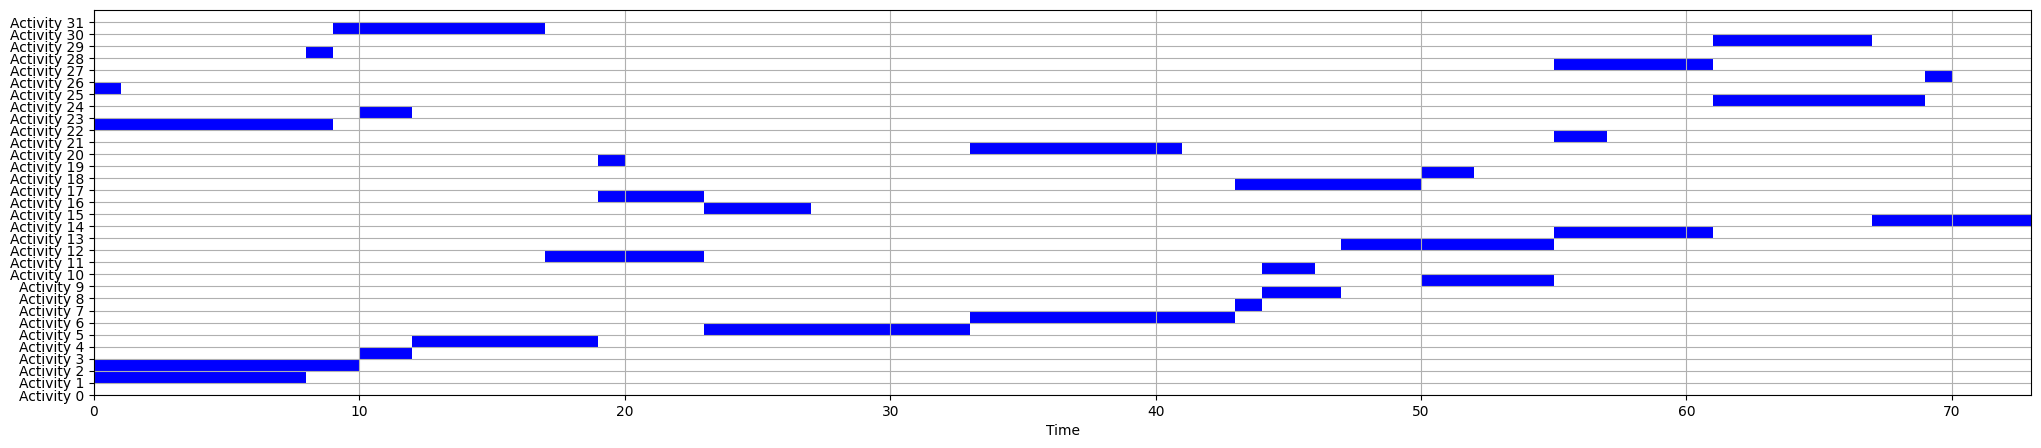

In [44]:
import matplotlib.pyplot as plt

# Define the data for the Gantt chart
print(sol.get_value(x[0]))
start_times = [sol.get_var_solution(x[i]).get_start() for i in range(no_jobs)]
end_times = [sol.get_var_solution(x[i]).get_end() for i in range(no_jobs)]

# Create the Gantt chart
fig, ax = plt.subplots()
for i in range(no_jobs):
    ax.broken_barh([(start_times[i], end_times[i] - start_times[i])], (i, 1), facecolors='blue')
ax.set_ylim(0, no_jobs)
ax.set_xlim(0, max(end_times))
ax.set_xlabel('Time')
ax.set_yticks(range(no_jobs))
ax.set_yticklabels(['Activity %d' % i for i in range(no_jobs)])
ax.grid(True)
plt.show()

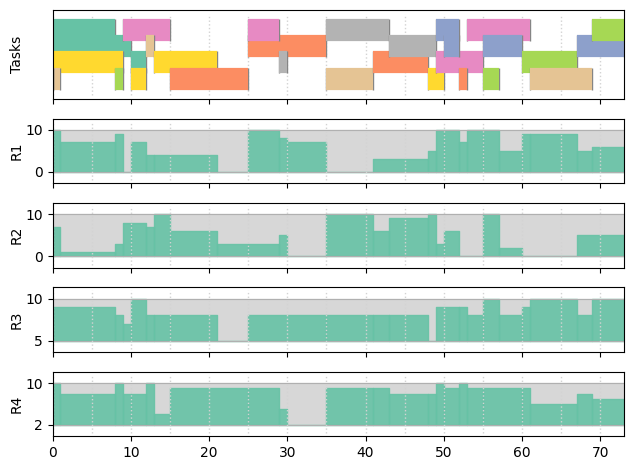

In [10]:
# https://ibmdecisionoptimization.github.io/docplex-doc/cp/visu.rcpsp.py.html

from docplex.cp.model import CpoStepFunction
import docplex.cp.utils_visu as visu

if sol and visu.is_visu_enabled():
    load = [CpoStepFunction() for j in range(no_resources)]
    for i in range(no_jobs):
        itv = sol.get_var_solution(x[i])
        for j in range(no_resources):
            if 0 < requests[j][i]:
                load[j].add_value(itv.get_start(), itv.get_end(), requests[j][i])

    visu.timeline('Solution for RCPSP ') # + filename)
    visu.panel('Tasks')
    for i in range(no_jobs):
        visu.interval(sol.get_var_solution(x[i]), i, x[i].get_name())
    for j in range(no_resources):
        visu.panel('R' + str(j+1))
        visu.function(segments=[(0, 200, capacities[j])], style='area', color='lightgrey')
        visu.function(segments=load[j], style='area', color=j)
    visu.show()